In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("/content/sample_data/Data.csv")

In [3]:
df.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


In [4]:
df=df.dropna()

In [5]:
df.columns

Index(['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM', 'PM 2.5'], dtype='object')

In [6]:
## creating an (1 X n) matrix of air quality index
def air_quality_index_label(row):
    val = row['PM 2.5']
    if val <= 50:
        return "Good"
    elif val <= 100:
        return "Moderate"
    elif val <= 150:
        return "Unhealthy"
    elif val <= 200:
        return "Unhealthy for Strong People"
    else:
        return "Hazardous"
    
air_quality = df.apply(air_quality_index_label, axis=1)

In [7]:
# removing PM 2.5 column and adding quality column in another dataframe
categorical_dataframe = df.drop(['PM 2.5'], axis=1)
categorical_dataframe.columns

Index(['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM'], dtype='object')

In [8]:
categorical_dataframe["Quality"] = air_quality
categorical_dataframe.head()

,T,TM,Tm,SLP,H,VV,V,VM,Quality
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,Hazardous
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,Unhealthy for Strong People
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,Unhealthy for Strong People
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,Hazardous
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,Hazardous


In [9]:
import seaborn as sns

In [10]:
Y = df['PM 2.5']
X = df.drop(['PM 2.5'], axis=1)

In [11]:

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=2)

In [13]:
reg = MLPRegressor()

In [14]:
reg.fit(X_train, Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [15]:
reg.score(X_train, Y_train)

0.503343648182649

In [16]:

reg.score(X_test, Y_test)

0.43271245284984944

In [17]:

from sklearn.model_selection import cross_val_score

In [18]:
cross_val_score(reg, X_train, Y_train, cv=5)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


array([0.48502452, 0.49518362, 0.48974981, 0.51000511, 0.44087016])

In [19]:
prediction=reg.predict(X_test)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


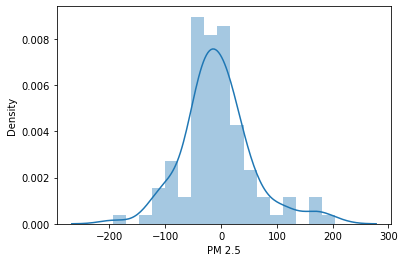

In [20]:
sns.distplot(Y_test-prediction)